In [1]:
import matplotlib
matplotlib.__version__

'3.3.4'

# Персонализация в один клик #

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.    
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

# Описание задачи #

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.    

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.    
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.    
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.    

# Описание исходных данных #

В компании принято выделять два уровня активности:
- «снизилась», если клиент стал покупать меньше товаров,
- «прежний уровень».    

Собраны данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.    

**Описание данных** файла *market_file*
 (поведение покупателя на сайте, коммуникации с покупателем, продуктовое поведение покупателя):

- **id** — номер покупателя в корпоративной базе данных;    
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».    
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».    
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.    
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.    
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.    
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.     
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.    
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.    
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.    
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.     
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.     
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**Описание данных** файла *market_money* (данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом)

- **id** — номер покупателя в корпоративной базе данных.    
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.    
- **Выручка** — сумма выручки за период.

**Описание данных** файла *market_time* (данные о времени (в минутах), которое покупатель провёл на сайте в течение периода)

- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.

**Описание данных** файла *money* (данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю)

- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.

## Загрузка данных ##

In [2]:
#!pip install shap
#!pip install scikit-learn==1.1.3
#!pip install phik
#!pip install matplotlib==3.8.4

In [3]:
# Импортируем все нужные библиотеки и инструменты
import pandas as pd
import seaborn as sns
import numpy  as np
import shap
import phik

from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder
)
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    f1_score
)

# зададим параметры окна вывода графиков
plt.rcParams["figure.figsize"] = (12,9)

Считываем исходные данные и формируем датафреймы

In [4]:
# считываем данные из файла market_file.csv
try:
    df_mar_data = pd.read_csv('с:/users/bny_7/datasets/market_file.csv')
except:    
    df_mar_data = pd.read_csv('/datasets/market_file.csv')
    
# считываем данные из файла market_money.csv
try:
    df_mar_money = pd.read_csv('с:/users/bny_7/datasets/market_money.csv')
except:    
    df_mar_money = pd.read_csv('/datasets/market_money.csv')
    
# считываем данные из файла market_time.csv
try:
    df_mar_time = pd.read_csv('с:/users/bny_7/datasets/market_time.csv')
except:    
    df_mar_time = pd.read_csv('/datasets/market_time.csv')   
    
# считываем данные из файла money.csv
try:
    df_profit = pd.read_csv('с:/users/bny_7/datasets/money.csv', sep=';', decimal = ',')
except:    
    df_profit = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')      
    
# выводим данные датафреймов для проверки загрузки
display(df_mar_data.head())
display(df_mar_money.head())
display(df_mar_time.head())
display(df_profit.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Вывод по результатам загрузки данных:**

- данные соответствуют описанию;
- в данных есть орфографические ошибки, которые необходимо будет исправить на этапе предобработки данных.

## Предобработка данных ##

Предобработаем данные: проверим пропуски, дубликаты, орфографические ошибки и устраним их

In [5]:
# Предобработаем данные о товарах и покупателях
display(df_mar_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

В датафрейме **df_mar_data** 1300 записей, пропусков нет, тип данных соответствует значениям в полях.    
Проверяем явные и скрытые дубликаты, орфографию.

In [6]:
display(f'Дубликатов: {df_mar_data.duplicated().sum()}')

# Проверим данные в полях со строковыми значениями
for i in df_mar_data.select_dtypes('object').columns:
    display(df_mar_data[i].value_counts())

'Дубликатов: 0'

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

да     962
нет    338
Name: Разрешить сообщать, dtype: int64

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

Видим, что данные в полях не содержат ошибок, кроме поля **Тип сервиса**, в котором неправильно записано слово 'стандартт'.    
Заменим эти значения и еще раз проверим на дубликаты.

In [7]:
df_mar_data['Тип сервиса'].replace('стандартт', 'стандарт', inplace=True)
display(df_mar_data['Тип сервиса'].value_counts())
display(f'Дубликатов: {df_mar_data.duplicated().sum()}')

стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

'Дубликатов: 0'

In [8]:
# Дооплнительно переименуем столбцы, заменив пробелы на нижнее подчеркивание
df_mar_data=df_mar_data.rename(columns={
    'Покупательская активность':'Покупательская_активность',
    'Тип сервиса':'Тип_сервиса',
    'Разрешить сообщать':'Разрешить_сообщать'
})

**df_mar_data**: пропусков нет, дубликатов нет, ошибок в данных нет.

In [9]:
# Предобработаем данные о выручке
display(df_mar_money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

В датафрейме **df_mar_money** 3900 записей, пропусков нет, тип данных соответствует значениям в полях.    
Проверяем явные и скрытые дубликаты, орфографию.

In [10]:
display(f'Дубликатов: {df_mar_money.duplicated().sum()}')
display(df_mar_money['Период'].value_counts())

'Дубликатов: 0'

предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: Период, dtype: int64

**df_mar_money**: пропусков нет, дубликатов нет, ошибок в данных нет, данные представлены за 3 последних месяца.

In [11]:
# Предобработаем данные о времени, проведенном покупателем на сайте
display(df_mar_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

В датафрейме **df_mar_time** 2600 записей, пропусков нет, тип данных соответствует значениям в полях.    
Проверяем явные и скрытые дубликаты, орфографию.

In [12]:
display(f'Дубликатов: {df_mar_time.duplicated().sum()}')
display(df_mar_time['Период'].value_counts())

'Дубликатов: 0'

текущий_месяц       1300
предыдцщий_месяц    1300
Name: Период, dtype: int64

Видим, что в поле **Период** присутствует орфографическая ошибка: предыд**Ц**щий_месяц.    
Заменим эти значения.

In [13]:
df_mar_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц', inplace=True)
display(df_mar_time['Период'].value_counts())

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

**df_mar_time**: пропусков нет, дубликатов нет, ошибок в данных нет, данные представлены за 2 последних месяца.

In [14]:
# Предобработаем данные о прибыли
display(df_profit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

В датафрейме **df_profit** 1300 записей, пропусков нет, тип данных соответствует значениям в полях.    
Проверяем дубликаты.

In [15]:
display(f'Дубликатов: {df_profit.duplicated().sum()}')

'Дубликатов: 0'

**df_profit**: пропусков нет, дубликатов нет.

**Вывод по результатам предобработки данных:**

- в датафрейме **df_mar_data** 1300 записей, пропусков нет, дублей нет, типы данных соответствуют значениям. В поле **Тип сервиса** исправлена орфографическая ошибка: 'стандартт' заменен на 'стандарт'.    
- в датафрейме **df_mar_money** 3900 записей, пропусков нет, дублей нет, типы данных соответствует значениям.    
- в датафрейме **df_mar_time** 2600 записей, пропусков нет, дублей нет, типы данных соответствует значениям. В поле **Период** исправлена орфографическая ошибка: 'предыдцщий_месяц' заменена на 'предыдущий_месяц'.    
- в датафрейме **df_profit** 1300 записей, пропусков нет, дублей нет, типы данных соответствует значениям.

## Исследовательский анализ данных ##

In [16]:
display(df_mar_data.describe())

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Выбросы в данных отсутствуют. Построим графики, чтобы в этом убедиться.

In [17]:
df_mar_data.drop('id', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская_активность            1300 non-null   object 
 1   Тип_сервиса                          1300 non-null   object 
 2   Разрешить_сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит              

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


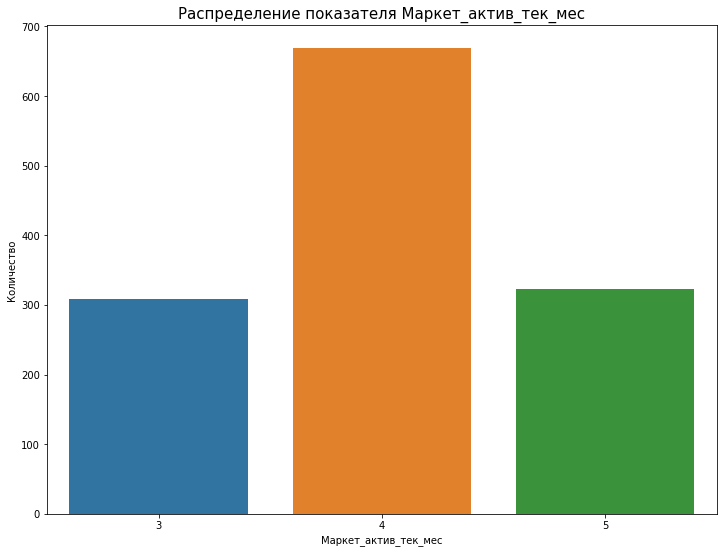

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


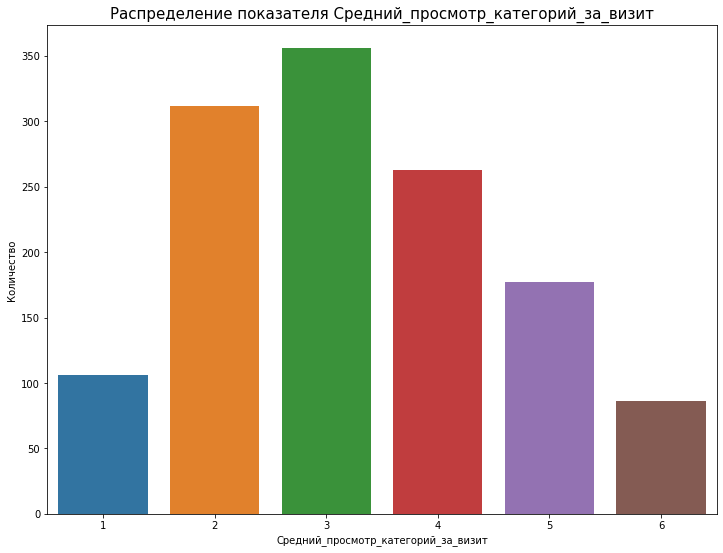

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


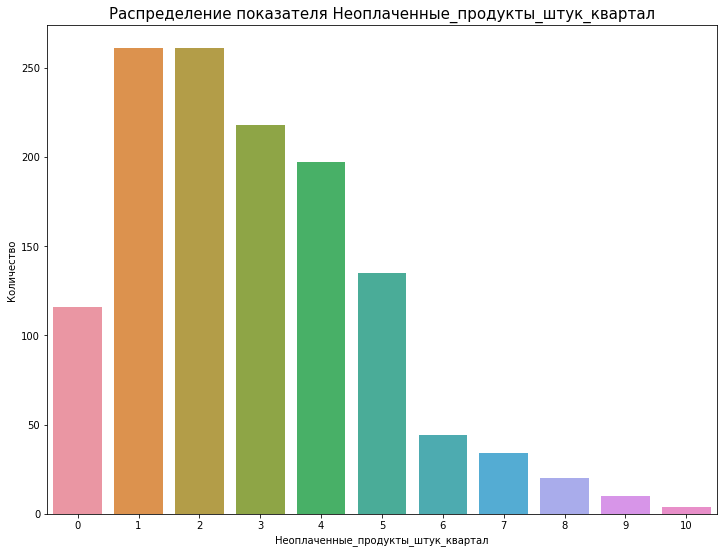

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


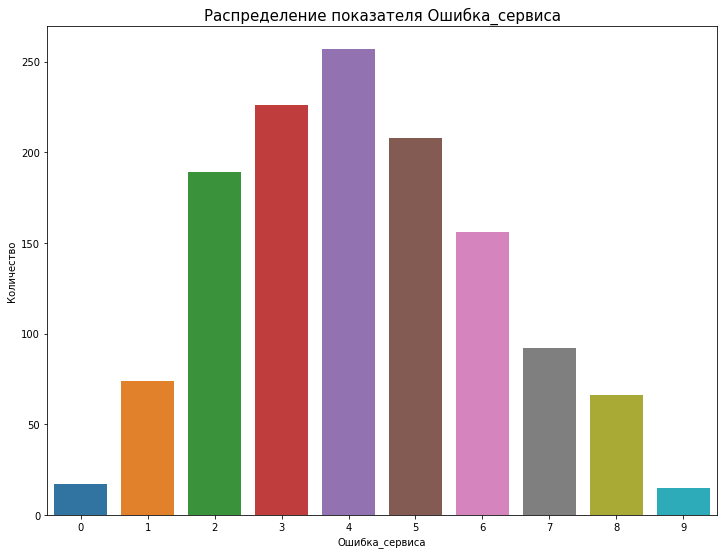

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


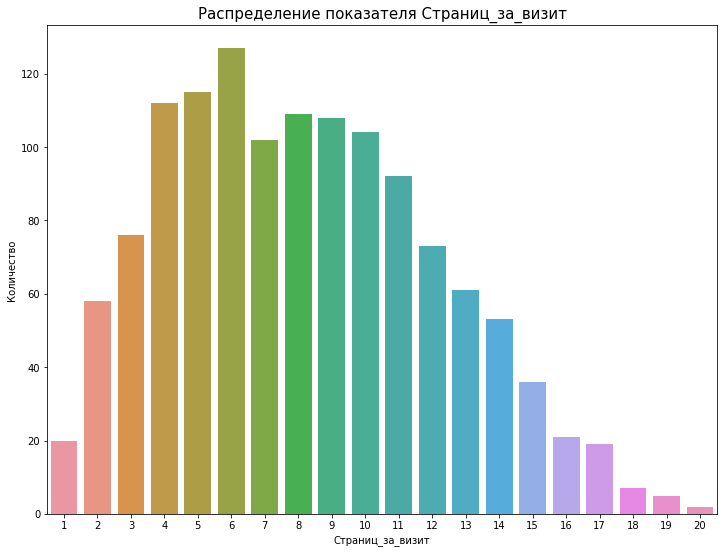

In [18]:
# посмотрим на распределение дискретных величин в цикле
for i in df_mar_data.drop(['id', 'Длительность'], axis=1).select_dtypes('int64').columns:
    sns.countplot(df_mar_data[i])
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.title(f'Распределение показателя {i}', fontsize=15)
    plt.show()

Видим, что среднее число показателя маркетинговых акций в текущем месяце равно 4.    
Количества средних просмотров составляет 3-4 в месяц, выглядит все естественно, аномалий нет.    
А вот с неоплаченными продуктами мы видим, что чаще всего в корзине оставляют 1-2 товара, а 10 - явление редкое. В целом, показатели нормальные, выбросов нет.     
Среднее значение показателя Ошибка_сервиса составляет 4-5, выбросов нет.    
Среднее значение показателя количества посещенных страниц за визит составляет 7-8, но кого-то хватает и на 20 - так бывает. Выбросов нет, ничего удалять, заменять не будем.

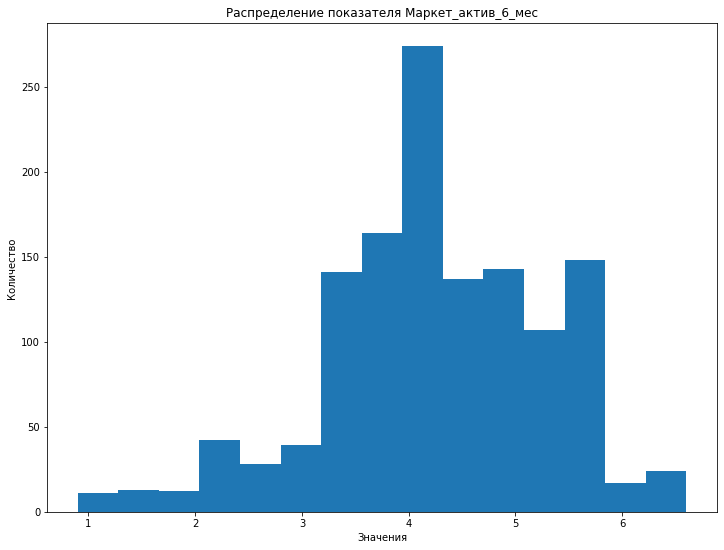

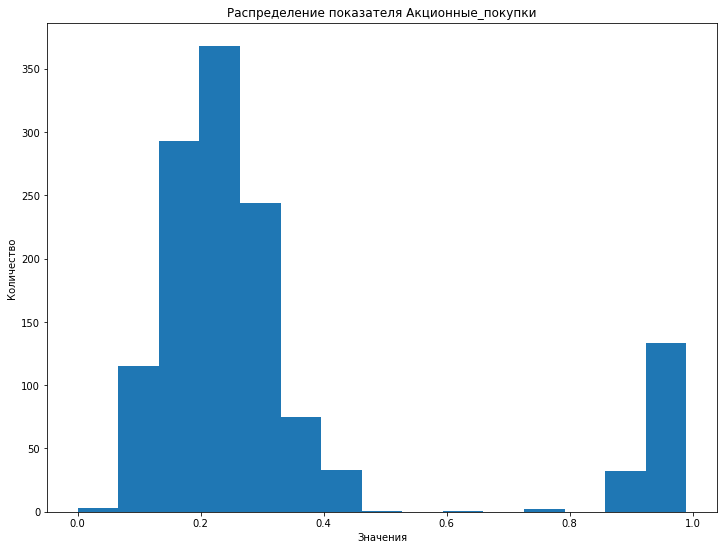

In [19]:
# посмотрим на распределение непрерывных величин в цикле
for i in df_mar_data.drop('id', axis=1).select_dtypes('float64').columns:
    df_mar_data[i].plot(
        kind='hist',
        bins=15,
        title=f'Распределение показателя {i}')
    plt.xlabel('Значения')
    plt.ylabel('Количество')
    plt.show()

Из построенных графиков видим, что распределение для среднего числа акций в месяц далеко от идеального нормального, но с ярко выраженным центром в 4 акции, которые мы видели и раньше. Видимо, 4 акции - это взвешенное с точки зрения магазина количество акций, чтобы клиенты не начали бросать трубки )) Ничего менять в этих данных не будем.    
Распределение, полученное для долей акционных товаров от общего количества, позволяет сделать вывод, что это больше категориальный признак. Поэтому в дальнейшем мы заменим его на бинарный признак с порогом в 0.5, который четко виден на графике.

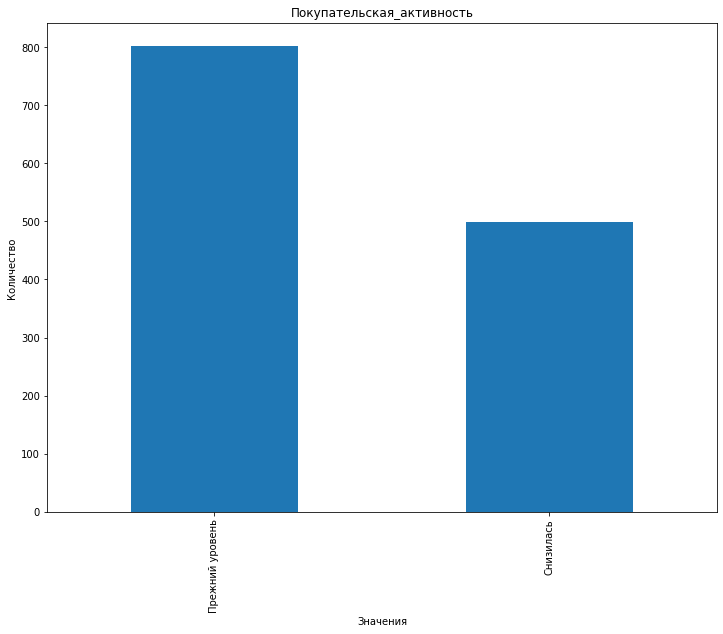

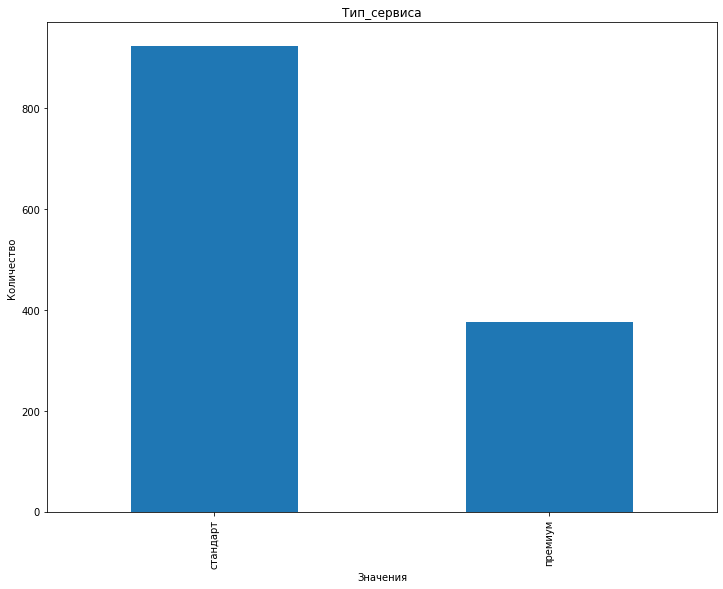

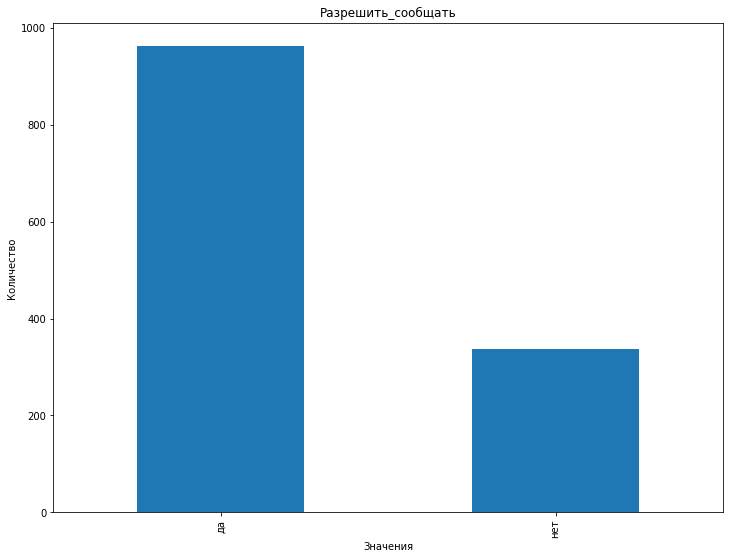

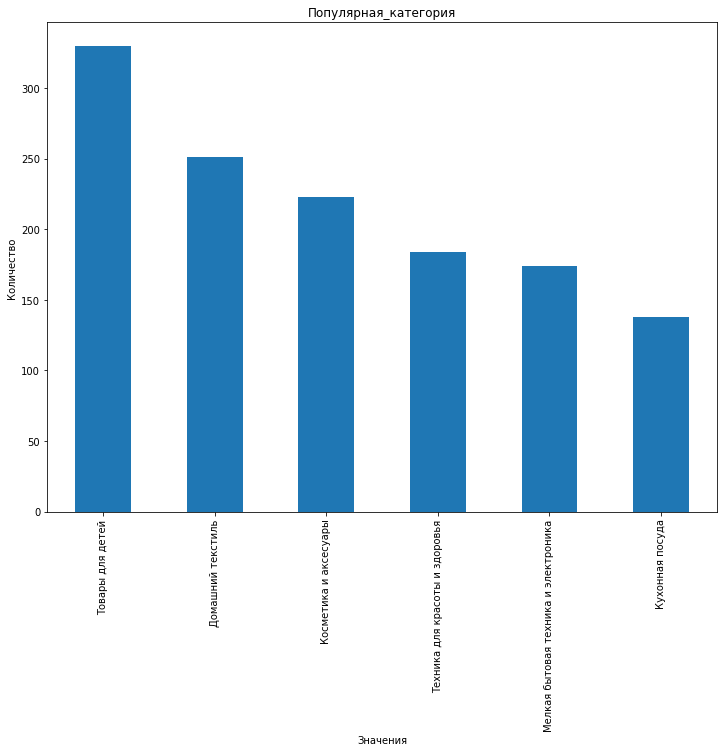

In [20]:
# Исследуем категориальные поля, их 4 штуки
for i in df_mar_data.select_dtypes('object').columns:
    df_mar_data[i].value_counts().plot(
        kind='bar',
        title=i,
        xlabel='Значения',
        ylabel='Количество')
    plt.show()

Покупательская активность большинства покупателей сохраняется на прежнем уровне (приблизительно 800 против 500).    
Тип сервиса Стандарт популярнее Премиума (приблизительно 900 против 400).    
Большая часть покупателей согласились с рассылкой предложений (приблизительно 1000 против 400).    
Самая популярная категория у покупателей - Товары для детей (приблизительно 325 против 250 в следующей по популярности категории). 

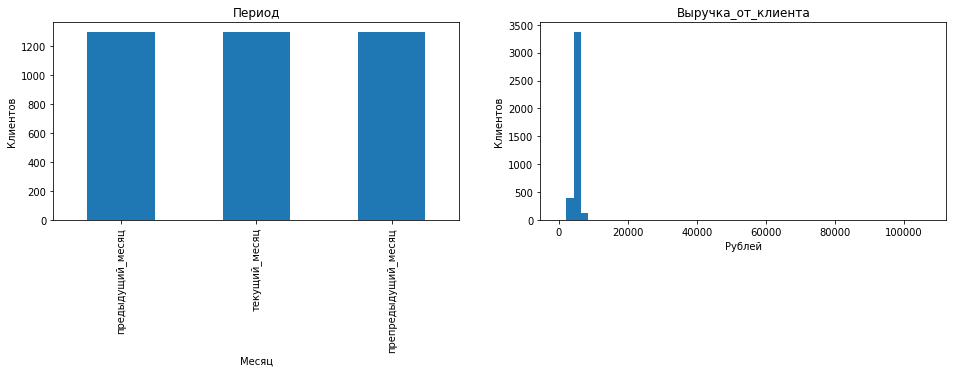

In [21]:
# таблица df_mar_money
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df_mar_money['Период'].value_counts().plot(kind='bar', title = 'Период', xlabel='Месяц', ylabel='Клиентов')
plt.subplot(2,2,2)
df_mar_money['Выручка'].plot(kind='hist', bins=50,
                             title = 'Выручка_от_клиента', xlabel='Рублей', ylabel='Клиентов')
plt.xlabel('Рублей')
plt.ylabel('Клиентов')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


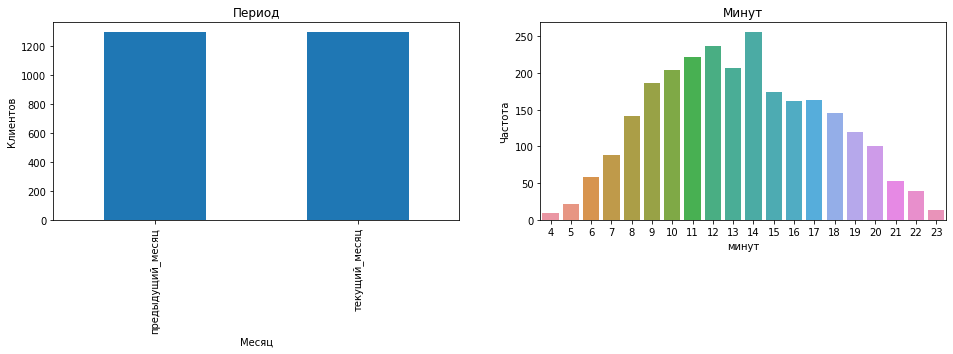

In [22]:
# таблица df_mar_time
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df_mar_time['Период'].value_counts().plot(kind='bar', title = 'Период', xlabel='Месяц', ylabel='Клиентов')
plt.subplot(2,2,2)
sns.countplot(df_mar_time['минут'])
plt.title('Минут')
plt.ylabel('Частота')
plt.show()

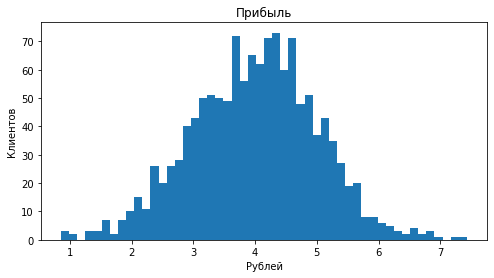

In [23]:
# таблица df_profit
plt.figure(figsize=(8,4))
df_profit['Прибыль'].plot(kind='hist',bins=50, title = 'Прибыль', xlabel='Месяц', ylabel='Клиентов')
plt.xlabel('Рублей')
plt.ylabel('Клиентов')
plt.show()

Категориальные данные (Период) в таблицах df_mar_money и df_mar_time представлены одинаковым количеством записей.    
Данные о Выручке от клиента за все время использования сайта и Прибыли имеют нормальное распределение. Выброс видим в таблице с выручкой - в 0 и в районе 100000. Далее подсчитаем количество таких данных и если их будет мало, то удалим их или заменим на медианное значение. Количество минут, проведенное на сайте в среднем тяготеет к 13-14 минутам, выбросов нет, данные нормальные.

**Вывод по результатам исследовательского анализа данных:**

**Таблица df_mar_data**.

Данные в полях таблицы адекватные, выбросов нет, непрерывные величины имеют близкие к нормальному распределения со смещением влево. В категориальных признаках тоже все спокойно. Поля с дискретными значениями не содержат аномальных значений.    
- Поле с акционными данными мы решили превратить в бинарный признак, потому что на графике видно явное разделение с порогом 0.5. 
- Данные в поле Маркет_актив6мес имеет также нормальное распределение без смещений, но с провалами (пустые диапазоны значений). 
- Покупательская *активность* большинства покупателей *сохраняется на прежнем уровне* (приблизительно 800 против 500).    
- Тип сервиса Стандарт *популярнее* Премиума (приблизительно 900 против 400).    
- Большая часть покупателей *согласились с рассылкой* предложений (приблизительно 1000 против 400).    
- Самая популярная категория у покупателей - Товары для детей (приблизительно 325 против 250 в следующей по популярности категории).    
- Среднее количество акций, проводимых магазинов, равно 4.

**Таблица df_mar_money**.    
- Данные в поле Выручка имеют нормальное распределение с выбросами в районе 0 и 100000. С этими данными мы разберемся после объединения таблиц.

**Таблица df_mar_time**.     
- Среднее количество минут, проведенное на сайте в среднем тяготеет к 13-14 минутам за период.

**Таблица df_mar_profit**.    
- Данные в поле Прибыль имеют нормальное распределение с небольшими выбросами в верхней точке гистограммы.

## Объединение таблиц ##

Перед объединением преобразуем таблицы df_mar_time и df_mar_money, разместив категориальные данные о периоде в заголовки таблиц.

In [24]:
df_mar_time_pivot = df_mar_time \
        .pivot(index='id', columns='Период')

# преобразовываем мультииндекс в плоский
df_mar_time_pivot.columns = ['_'.join(col) for col in df_mar_time_pivot.columns.values]

# выводим датафрейм на экран
display(df_mar_time_pivot.head())

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [25]:
df_mar_money_pivot = df_mar_money \
        .pivot(index='id', columns='Период')

# преобразовываем мультииндекс в плоский
df_mar_money_pivot.columns = ['_'.join(col) for col in df_mar_money_pivot.columns.values]

# выводим датафрейм на экран
display(df_mar_money_pivot.head())

,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


Объединяем таблицы df_mar_data(market_file.csv), df_mar_money_pivot(market_money.csv), df_mar_time_pivot(market_time.csv).

In [26]:
df = df_mar_data.merge(df_mar_money_pivot, how = 'left', on = 'id')
df = df.merge(df_mar_time_pivot, how = 'left', on = 'id')
df = df.rename(columns={
    'минут_предыдущий_месяц':'Минут_предыдущий_месяц',
    'минут_текущий_месяц':'Минут_текущий_месяц'
})
display(df.head())

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


Отберем покупателей, которые совершали покупки в каждый из трех последних месяцев

In [27]:
df = df.query("Выручка_предыдущий_месяц !=0 & Выручка_препредыдущий_месяц !=0 & Выручка_текущий_месяц!=0")

In [28]:
# выведем длину массива, чтобы оценить, сколько записей отфильтровалось
print('Осталось',len(df),'покупателей')

Осталось 1297 покупателей


Исследуем повторно данные в новых столбцах, особенно обратим внимание на значения Выручки близкое к 100'000, которое мы нашли ранее. От 0-го значения мы уже избавились на предыдущем этапе.

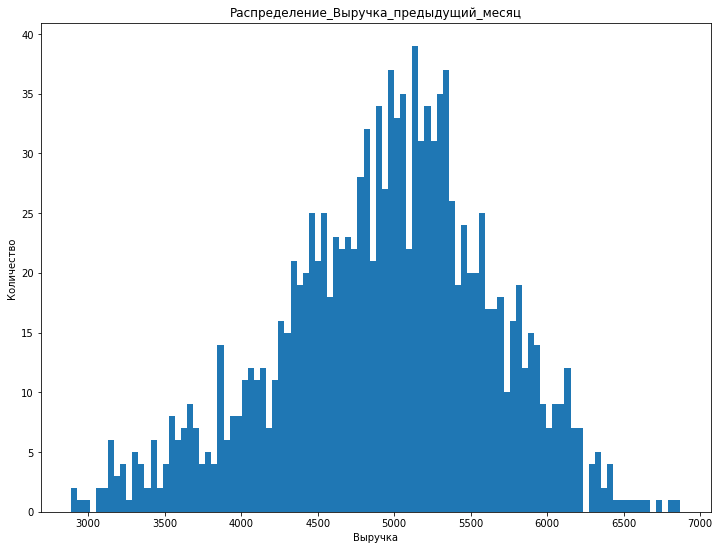

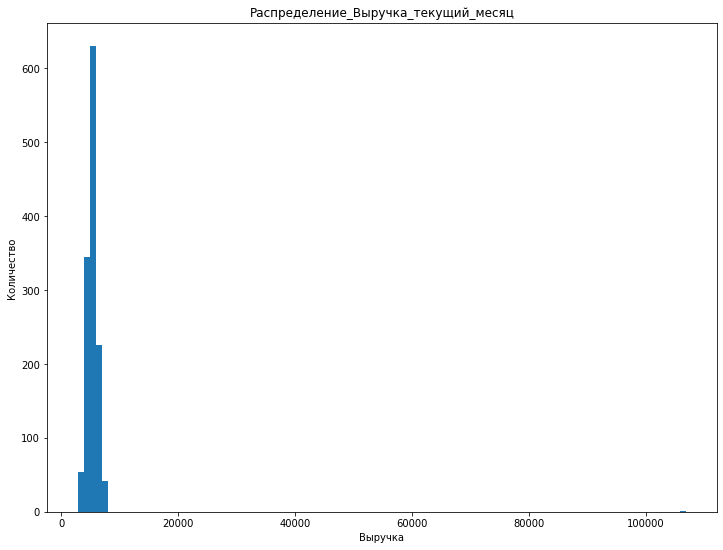

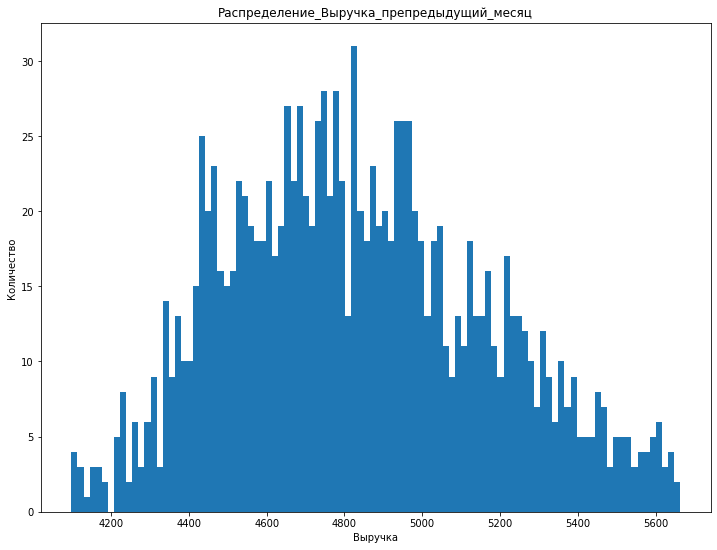

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


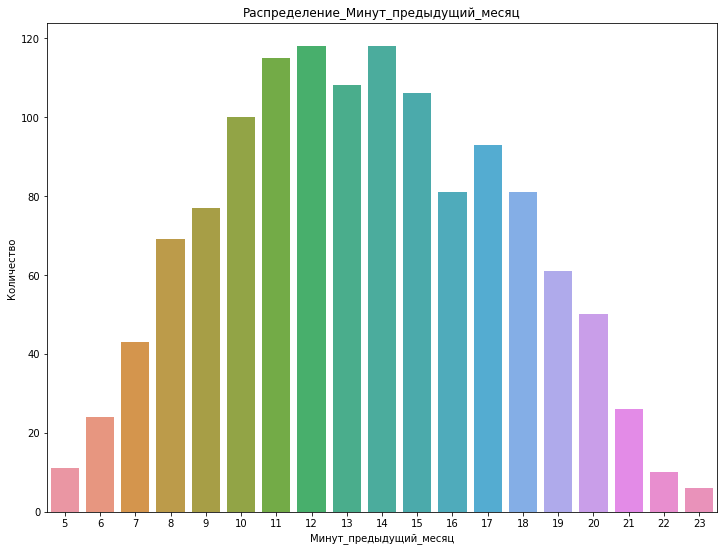

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


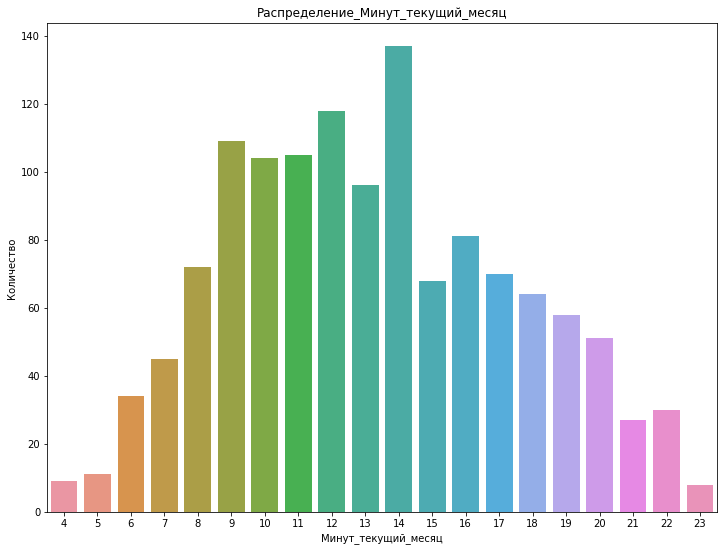

In [29]:
# построим распределения для выручки по месяцам
for i in ['Выручка_предыдущий_месяц','Выручка_текущий_месяц','Выручка_препредыдущий_месяц']:
    df[i].plot(
        kind='hist',
        bins=100,
        title=f'Распределение_{i}', 
        range = (df[i].min(), df[i].max()))
    plt.xlabel('Выручка')
    plt.ylabel('Количество')
    plt.show()

# построим распределения для дискретных величин минут
for i in ['Минут_предыдущий_месяц','Минут_текущий_месяц']:
    plot = sns.countplot(df[i])
    plot.set_title(f'Распределение_{i}')
    plot.set_ylabel('Количество')
    plt.show()

На графике распределения выручки за текущий месяц наблюдаем тот самый выброс около 100'000. Построим статистику для всех полей и изучим ее.

In [30]:
# выведем статистику по полям датафрейма
display(df.describe())

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584,4948.339630,4836.367772,5316.449268,13.469545,13.211257
std,374.578554,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061,701.228571,333.438742,2942.469139,3.936323,4.220222
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000,2890.000000,4098.000000,2758.700000,5.000000,4.000000
25%,215675.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000,4498.500000,4585.000000,4706.600000,11.000000,10.000000
50%,215999.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000,5005.500000,4812.000000,5180.300000,13.000000,13.000000
75%,216323.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000,5409.000000,5055.000000,5761.300000,17.000000,16.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000,6869.500000,5663.000000,106862.200000,23.000000,23.000000


Цифры для Выручка_предыдущий_месяц нормальные, для Выручка_препредыдущий_месяц тоже адекватные, а вот максимальное значение для Выручка_текущий_месяц - 106'862.2рубля, что сильно выбивается из общей картины. Проверим, единственное ли это аномальное значение.

In [31]:
df.sort_values(by = 'Выручка_текущий_месяц').tail()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц
796,216144,Прежний уровень,стандарт,да,4.8,4,541,0.29,Мелкая бытовая техника и электроника,3,5,5,9,6337.5,5091.0,7547.8,19,11
493,215841,Снизилась,стандарт,да,6.3,4,320,0.12,Мелкая бытовая техника и электроника,5,4,4,10,6588.5,5621.0,7557.0,9,12
87,215435,Снизилась,премиум,да,4.8,4,875,0.35,Товары для детей,2,2,5,9,6869.5,5008.0,7605.3,7,11
145,215493,Снизилась,стандарт,да,4.0,5,881,0.99,Кухонная посуда,3,5,6,5,6716.5,4870.0,7799.4,9,10
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,6077.0,5051.0,106862.2,12,14


Такое значение оказалось единственным. Не будем гадать, в каком знаке ошиблись при вводе и ошиблись ли вообще - удалим это значение из исследуемого набора.

In [32]:
df = df.drop(df.query('Выручка_текущий_месяц == 106862.2').index, axis=0)
display(len(df))

1296

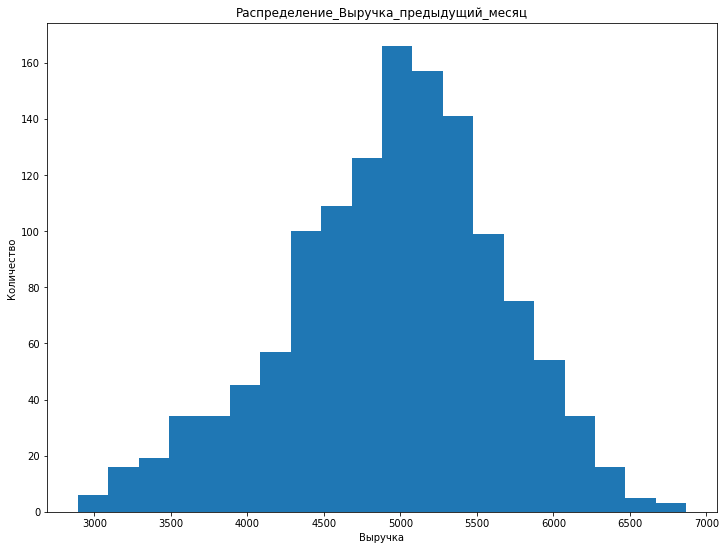

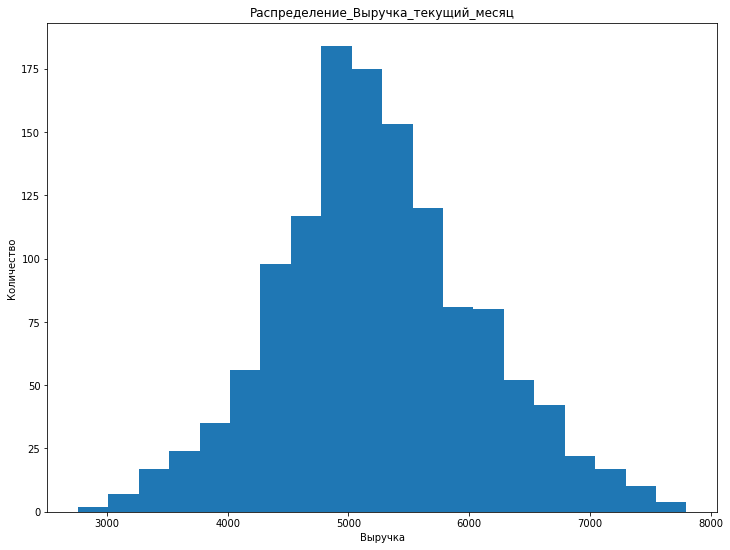

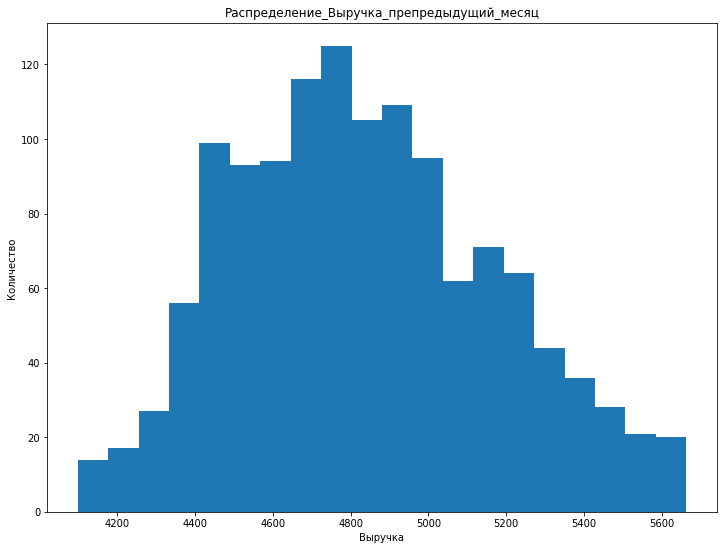

In [33]:
# построим распределения для выручки по месяцам, чтобы удостовериться в корректности наших действий
for i in ['Выручка_предыдущий_месяц','Выручка_текущий_месяц','Выручка_препредыдущий_месяц']:
    df[i].plot(
        kind='hist',
        bins=20,
        title=f'Распределение_{i}', 
        range = (df[i].min(), df[i].max()))
    plt.xlabel('Выручка')
    plt.ylabel('Количество')
    plt.show()

**Вывод по результатам объединения данных исходных таблиц:**

Построенное распределение для Выручки за текущий месяц показало, что у нас есть выброс. Поскольку это было единственное значение, то принято решение его удалить. Остальные показатели не вызывают сомнений.    
Распределения выручки похожи на нормальные.

## Корреляционный анализ ##

Проведем корреляционный анализ признаков в итоговой таблице для моделирования. Для этого используем метод **phik_matrix**.

In [34]:
# задаем столбцы с непрерывными признаками и рассчитываем матрицу
interval_cols = ['Маркет_актив_6_мес', 'Длительность',
                 'Акционные_покупки', 'Выручка_препредыдущий_месяц',
                 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц']
corr_matrix = df.drop('id', axis=1).phik_matrix(interval_cols = interval_cols)

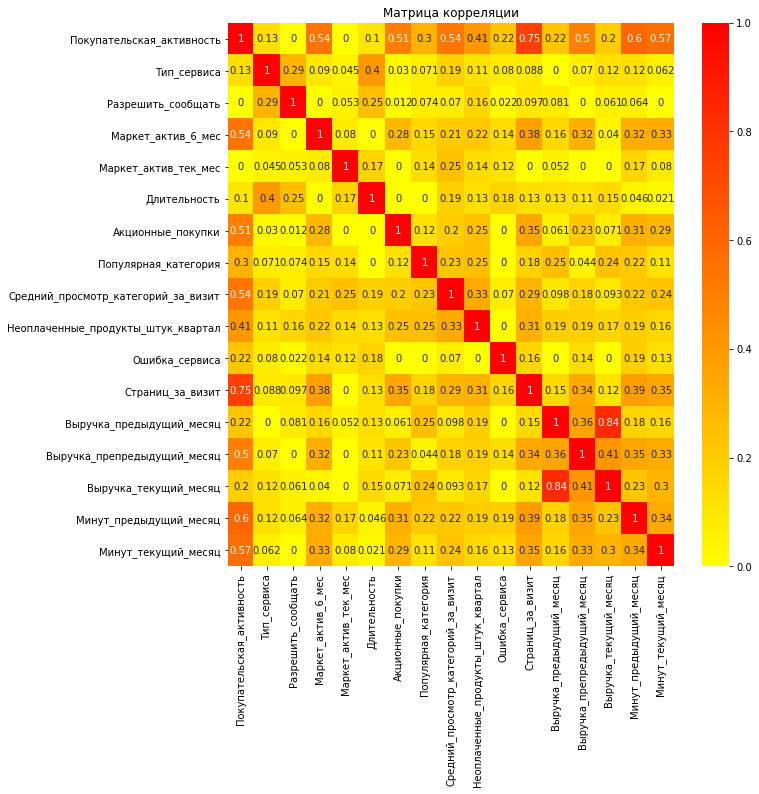

In [35]:
# строим тепловую карту для анализа
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='autumn_r')
plt.title('Матрица корреляции')
plt.show()

Наблюдаем зависимости:
- Выручка_предыдущий_месяц и Выручка_текущий_месяц (0.88) - самая сильная зависимость, вероятно из-за схожести значений. Показатель мультиколлинеарности 0,9-0,95 здесь не наблюдается, но значение близко к пограничному, поэтому заменим показатели Выручки по месяцам на суммарную выручку за 3 месяца.
- Страниц_за_визит и Показатель_активности (0.55),
- Минут_предыдущий_месяц и Показатель активности (0.51),
- Акционные_покупки и Показатель_активности (0.46),
- Минут_предыдущий_месяц и Страниц_за_визит (0.45),
- Минут текущий месяц и Показатель активности (0.44),
- Показатель_активности и Маркет_актив_6_мес (0.38),
- Акционные_покупки и Страниц_за_визит (0.36)
- Минут_предыдущий_месяц и Выручка_предыдущий_месяц (0.35),
- Страниц_за_визит и Маркет_актив_6_мес (0.32).

In [36]:
# Переведем показатель Акционные_покупки в категориальный с порогом 50% от общего числа покупок, то есть 0,5
df['Акция'] = df['Акционные_покупки'].apply(lambda x: 'редко' if x<0.5 else 'часто')
df_cat = df.drop(['Акционные_покупки'], axis=1)
df_cat.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц,Акция
1,215349,Снизилась,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,часто
2,215350,Снизилась,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,редко
3,215351,Снизилась,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,часто
4,215352,Снизилась,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,часто
5,215353,Снизилась,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,редко


In [37]:
# Добавим поле с общей выручкой за 3 последних месяца
df_cat['Выручка_3_мес'] = df_cat[['Выручка_предыдущий_месяц','Выручка_текущий_месяц','Выручка_препредыдущий_месяц']].sum(axis=1)

# Добавим поле с общим количеством минут, проведенных на сайте за последние 3 месяца 
df_cat['Минут_3_мес'] = df_cat[['Минут_предыдущий_месяц','Минут_текущий_месяц']].sum(axis=1)

# Удалим поля, по которым рассчитали суммарный показатель
df_cat = df_cat.drop(['Выручка_предыдущий_месяц',
                     'Выручка_текущий_месяц',
                     'Выручка_препредыдущий_месяц',
                     'Минут_предыдущий_месяц',
                     'Минут_текущий_месяц'
                     ], axis=1)
df_cat.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Акция,Выручка_3_мес,Минут_3_мес
1,215349,Снизилась,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,часто,14659.6,22
2,215350,Снизилась,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,редко,15341.9,21
3,215351,Снизилась,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,часто,17561.4,24
4,215352,Снизилась,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,часто,16274.0,19
5,215353,Снизилась,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,редко,15251.0,20


In [38]:
# перестроим матрицу на новом датафрейме, зададим новые столбцы с непрерывными значениями
interval_cols = ['Маркет_актив_6_мес', 'Длительность', 'Выручка_3_мес']
corr_matrix_union = df_cat.drop('id', axis=1).phik_matrix(interval_cols = interval_cols)

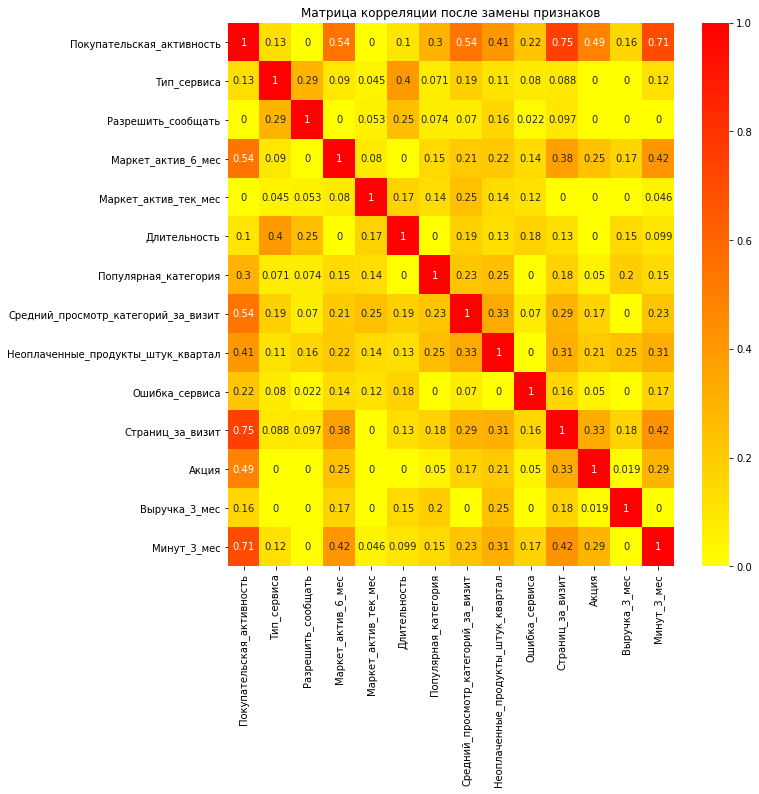

In [39]:
plt.figure(figsize=(10, 10))
# перестроим тепловую карту для анализа
sns.heatmap(corr_matrix_union, annot=True, cmap='autumn_r')
plt.title('Матрица корреляции после замены признаков')
plt.show()

**Вывод по результатам корреляционного анализа:**

На целевой показатель *Покупательская активность* больше всего влияют:
- Количество минут, проведенных на сайте за последние 3 месяца (Минут_3_мес),
- Количество страниц, просмотренных покупателем за 1 визит (Страниц_за_визит),
- Маркетинговая активность компании за последние 6 месяцев и Средний просмотр категорий за 1 визит покупателя в равной степени,
- Акционные_покупки,
- Неоплаченные_продукты_штук_квартал.

## Использование пайплайнов ##

Обучим 4 модели:
- KNeighborsClassifier(),
- DecisionTreeClassifier(),
- LogisticRegression(),
- SVC().

In [40]:
# делаем поле с id индексным
df_cat = df_cat.set_index('id')

In [41]:
# задаем константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# делим наш датасет на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(
    df_cat.drop('Покупательская_активность', axis=1),
    df_cat['Покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_cat['Покупательская_активность'])

In [42]:
display(df_cat.columns)
display(df_cat.head())

Index(['Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Популярная_категория', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Акция', 'Выручка_3_мес', 'Минут_3_мес'],
      dtype='object')

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Акция,Выручка_3_мес,Минут_3_мес
id,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,часто,14659.6,22
215350,Снизилась,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,редко,15341.9,21
215351,Снизилась,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,часто,17561.4,24
215352,Снизилась,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,часто,16274.0,19
215353,Снизилась,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,редко,15251.0,20


In [43]:
# создадим экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучим модель и трансформируем тренировочную выборку 
y_train = label_encoder.fit_transform(y_train)

# трансформируем тестовую выборку
y_test = label_encoder.transform(y_test)

In [44]:
# создаём списки с названиями признаков
ohe_columns = ['Популярная_категория']
ord_columns = ['Акция', 'Тип_сервиса', 'Разрешить_сообщать']

In [45]:
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал',
               'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_3_мес', 'Минут_3_мес'    
              ]

In [46]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
ohe_pipe = Pipeline(
    [
     ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

In [47]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
ord_pipe = Pipeline(
    [
     ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories= [
                    ['редко', 'часто'],
                    ['стандарт', 'премиум'],
                    ['да', 'нет']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [48]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(transformers=
    [('onehot', ohe_pipe, ohe_columns),
     ('ordinal', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [49]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [50]:
# задаем словари с гиперпараметрами моделей
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,7),
        'models__max_features': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True, kernel = 'poly')],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Мы решаем задачу бинарной классификации и наша задача: научиться максимально правильно предсказывать целевой признак 'Снижение покупательской активности'. Поэтому для оценки качества модели мы будем использовать оценку ROC-AUC, которая покажет нам насколько хорошо наша модель предсказывает класс 1 (снижение покупательской акутивности). 

In [51]:
# запускаем поиск лучшей модели и ее параметров и обучаем ее на тренировочной выборке
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [52]:
randomized_search.fit(X_train, y_train)

rs = randomized_search.best_estimator_

In [53]:
# выводим на экран параметры лучшей модели
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print (f'Метрика лучшей модели, полученная кросс-валидацией: {randomized_search.best_score_: .2f}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Популярная_категория']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
           

In [54]:
# проверяем работу модели на тестовой выборке
# рассчитываем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)

# рассчитываем вероятности для тестовых данных
y_test_proba = randomized_search.predict_proba(X_test)

# выводим значение метрики roc-auc для тестовых данных
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba[:,1]): .2f}')

Метрика ROC-AUC на тестовой выборке:  0.92


In [55]:
# рассчитаем f1-метрику
print(f'Метрика F1-score на тестовой выборке: {f1_score(y_test, y_test_pred, average="macro"): .2f}')

Метрика F1-score на тестовой выборке:  0.89


In [56]:
# выведем результаты перебора всех моделей с параметрами
result = pd.DataFrame(randomized_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

   rank_test_score                                       param_models  \
6                1  LogisticRegression(C=3, penalty='l1', random_s...   
8                2            DecisionTreeClassifier(random_state=42)   
1                3            DecisionTreeClassifier(random_state=42)   
4                4            DecisionTreeClassifier(random_state=42)   
5                5            DecisionTreeClassifier(random_state=42)   
3                6            DecisionTreeClassifier(random_state=42)   
7                7            DecisionTreeClassifier(random_state=42)   
9                8            DecisionTreeClassifier(random_state=42)   
2                9            DecisionTreeClassifier(random_state=42)   
0               10            DecisionTreeClassifier(random_state=42)   

   mean_test_score                                             params  
6         0.897541  {'preprocessor__num': StandardScaler(), 'model...  
8         0.843003  {'preprocessor__num': MinMaxScal

Проверим нашу модель на адекватность. Для этого обучим модель методом DummyClassifier на тренировочной выборке и рассчитаем оценку roc-auc.

In [57]:
# строим модель на тренировочной выборке
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model = dummy_model.fit(X_train, y_train)

# выполним предсказание на тестовой выборке и рассчитаем вероятности предсказаний
dummy_model_preds = dummy_model.predict(X_test)
dummy_model_probas = dummy_model.predict_proba(X_test)[:,1]

# подсчитаем метрику ROC-AUC
dummy_roc = roc_auc_score(y_test,dummy_model_probas)
print('ROC-AUC =', round(dummy_roc,2))

ROC-AUC = 0.5


### **Выводы по результатам построения модели**

Мы собрали пайплайн для обучения 4 моделей с разным набором гиперпараметров. В результате перебора моделей и гиперпараметров лучше всех оказалась модель логистической регрессии со следующими параметрами:    
- LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear'),
- лучшей метрикой roc_auc, полученной кросс-валидацией = 0.9.    

Показатели точность прогноза на тестовой выборке мы оценили метриками:    
- roc_auc = 0.92,
- f1-мера = 0.89.

Для проверки адекватности полученной нами модели мы обучили еще одну модель методом DummyClassifier на тренировочных данных. Проверили ее качество на тестовой выборке и подсчитали оценку roc-auc, которой оценивали первую рабочую модель.    
Оценка, которую выдала модель Dummy, равна 0.5. То есть все наши усилия оправдали себя.

## Анализ важности признаков ##

In [58]:
# формируем тренировочную выборку, используя полученную модель
X_train_new = data_preprocessor.fit_transform(X_train)

# формируем тестовую выборку, используя полученную модель
X_test_new = data_preprocessor.transform(X_test)

# Создаем массив новых имен столбцов
feature_names = data_preprocessor.get_feature_names_out()

# Фильтруем датафрейм по списку полей, полученных после кодирования
X_test_new = pd.DataFrame(X_test_new, columns=feature_names)

# Инициализируем модель SHAP
explainer = shap.LinearExplainer(rs.named_steps['models'], X_test_new)

# Собираем данные для дальнейшей визуализации
shap_values = explainer(X_test_new)

In [59]:
# Построим график общей значимости признаков
#display(shap.plots.bar(shap_values, max_display=17))

Построить график общей значимости инструментами SHAP не получилось из-за проблем с библиоткой matplotlib,    
поэтому воспользуемся другим инструментом.

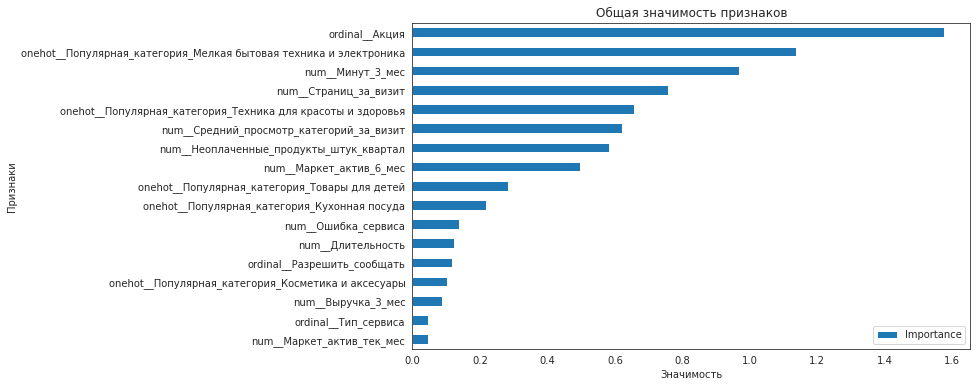

In [60]:
# инициализируем селектор и модель
selector = SelectKBest(f_classif, k=16)

# обучим SelectKBest
selector.fit(X_train_new, y_train)

# отложим значения коэффициентов на графике
coefficients = rs.named_steps['models'].coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending= True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title("Общая значимость признаков")
plt.xlabel("Значимость")
plt.ylabel("Признаки")
plt.show()

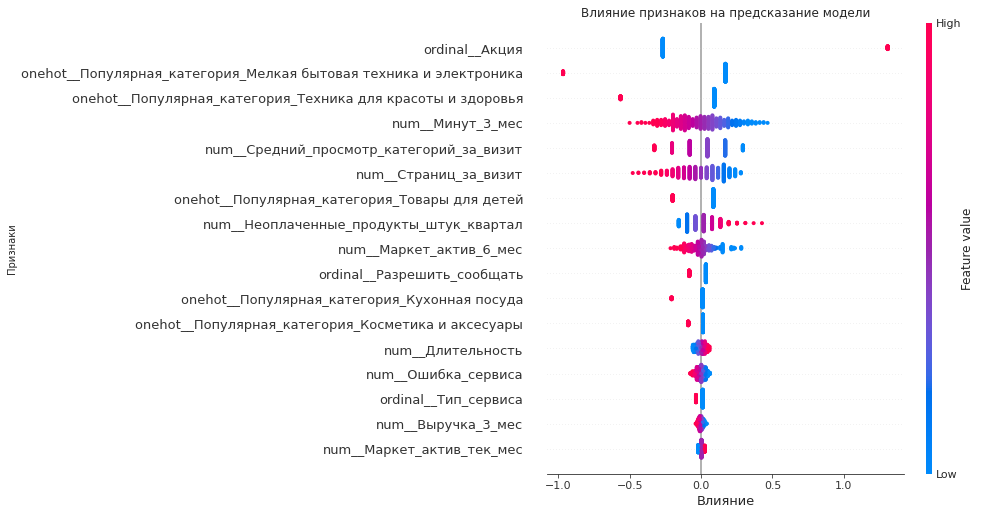

In [61]:
# Оценим, как признаки влияют на каждое предсказание модели
shap.plots.beeswarm(shap_values, max_display=17, show=False)
plt.title("Влияние признаков на предсказание модели")
plt.xlabel("Влияние")
plt.ylabel("Признаки")
plt.show()

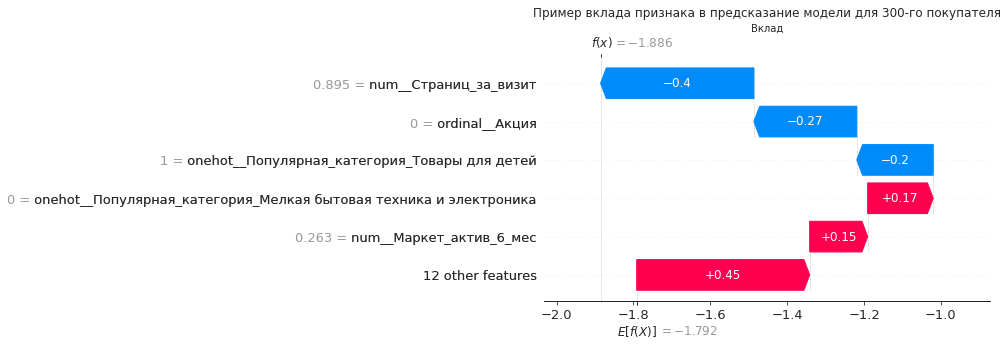

In [62]:
# Посмотрим на вклад каждого признака для 300-го покупателя
shap.plots.waterfall(shap_values[300], max_display=6, show=False)
plt.title("Пример вклада признака в предсказание модели для 300-го покупателя")
plt.xlabel("Вклад")
plt.ylabel("Признаки")
plt.show()

Малозначимыми признаками оказались:
- суммарная выручка за последние 3 месяца,
- действия маркетологов в текущем месяце.

Получается, что количество средств, которые человек тратит на покупки, и попытки маркетологов привлечь покупателя в текущем месяце ничего не значат. Возможно, в текущем месяце активность рекламы была слабой, поэтому и нет связи. 

Значимые признаки, влияющие на снижение покупательской активности:
- покупка акционных продуктов,
- покупки в категории Мелкая бытовая техника и техника для красоты и здоровья,
- средний показатель просмотров категорий за визит,
- количество минут, проведенных на сайте в последние 3 месяца,
- неоплаченные продукты в корзине.

Про любителей покупки акционных товаров можно сказать только то, что они либо очень расчетливы, а потому не тратят лишнее, либо же у них не хватает денег на покупку товаров. Следовательно, их будут привлекать только акции, а это не всегда повышает доход продавца.    
Категория Мелкая бытовая техника и категория техника для красоты и здоровья. Очевидно, что покупки в этих категориях имеют длительный срок эксплуатации и стоят недорого (мелкие), поэтому покупатели охотно тратят деньги на эти товары, предпочитая их дорогостоящим. Общее количество потраченных минут на сайте логично сказалось на объеме покупок.
По среднему показателю просмотров категорий за визит можно сделать вывод о предпочтениях покупателя и целенаправлено предлагать ему скидки в этой категории. Неоплаченные продукты - явный признак интереса, но, возможно, отсутствия средств. Покупатель может за ними вернуться.

Из анализа индивидуального влияния признаков на конечное решение спрогнозировать снижение покупательской активности пользователя видим, что:    
- чем больше акционных товаров у покупателя, тем выше риск снижения его покупательской активности,
- чем больше покупок в категориях мелкая бытовая техника и техника для красоты, тем выше шансы у такого покупателя сохранить покупательскую активность,
- увеличение показателя среднего просмотра категорий за визит сохраняет его покупательскую способность, а уменьшение - снижает и покупательскую активность,
- также увеличение количества страниц и минут за визит ведут к сохранению покупательской способности.

**Вывод по результатам анализа важности признаков:**    

С помощью SHAP-метода для построенной модели мы определили общую важность анализируемых признаков и их индивидуальное влияние на результат. Проанализировали полученные результаты и сделали следующие выводы для бизнеса:  
- признаки Акционные_покупки и мелкая бытовая техника и техника для красоты и здоровья в Популярная_категория сильно влияют на покупательскую способность клиента, так что необходимо их правильно сочетать;
- для людей, которые и так часто покупают товары, необходимо снизить количество маркетинговых предложений, чтобы не "пережать";
- для всех покупателей необходимо рекламировать товары из категорий, где они не делают покупок, например, контекстной рекламой;

## Сегментация покупателей ##

Подготовим итоговый набор данных для сегментации

In [63]:
df_profit = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')   

In [64]:
# формируем тренировочную выборку, используя полученную модель
X_train_2 = data_preprocessor.fit_transform(X_train)

# формируем тестовую выборку, используя полученную модель
X_test_2 = data_preprocessor.transform(X_test)
#y_predict = rs.named_steps['models'].predict(X_train_2)[:,1]
y_predict = rs.named_steps['models'].predict(X_test_2)

In [65]:
# Вычисляем вероятности снижения покупательской активности для тренировочной и тестовой выборок
y_train_proba = rs.named_steps['models'].predict_proba(X_train_2)[:,1]
y_test_proba = rs.named_steps['models'].predict_proba(X_test_2)[:,1]

# Создаем датафремы из тренировочной и тестовой выборок с дополнительным полем 'Вероятность'
X_tst = X_test.copy()
X_trn = X_train.copy()
X_tst['Вероятность'] = y_test_proba
X_trn['Вероятность'] = y_train_proba

# Формируем итоговый датафрейм путем слияния тренировочных и тестовых данных
df_market_predict = pd.concat([X_trn, X_tst])

# Задаем id как индекс и объединяем датафреймы
df_profit = df_profit.set_index('id')
df_market_predict = df_market_predict.join(df_profit)

In [66]:
# выводим результат объединения на экран
display(df_market_predict.head())

,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Акция,Выручка_3_мес,Минут_3_мес,Вероятность,Прибыль
id,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,редко,15531.7,26,0.045829,4.37
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,редко,14786.7,24,0.109796,4.03
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,редко,12537.4,23,0.046461,4.37
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,часто,14965.2,33,0.441586,5.58
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,редко,13007.0,20,0.177827,4.87


У нас всего 4 столбца с категориальными данными, поэтому построим график рассеяния отдельно и в разрезе категорий:    
Тип_сервиса, Разрешить_сообщать, Популярная_категория, Акция

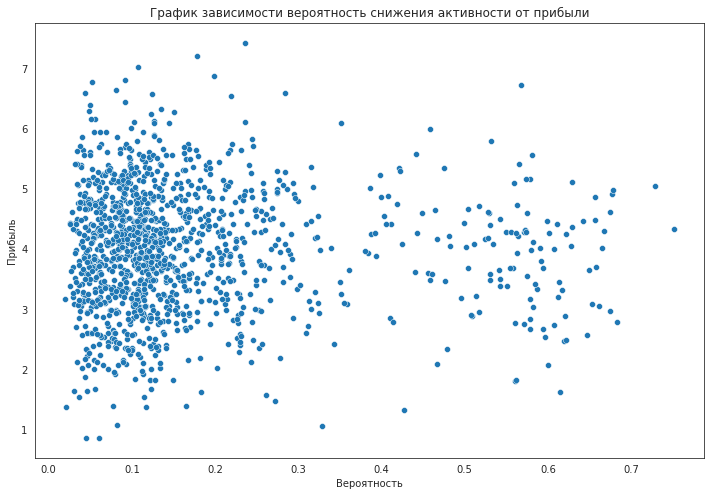

In [67]:
# строим чистую зависимость вероятности снижения активности от прибыли
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_market_predict, y='Прибыль', x='Вероятность')
plt.title('График зависимости вероятность снижения активности от прибыли')
plt.xlabel('Вероятность')
plt.ylabel('Прибыль')
plt.show()

Видно, что скопление малых вероятностей предсказания 1 (снижения покупательской способности) плотнее.

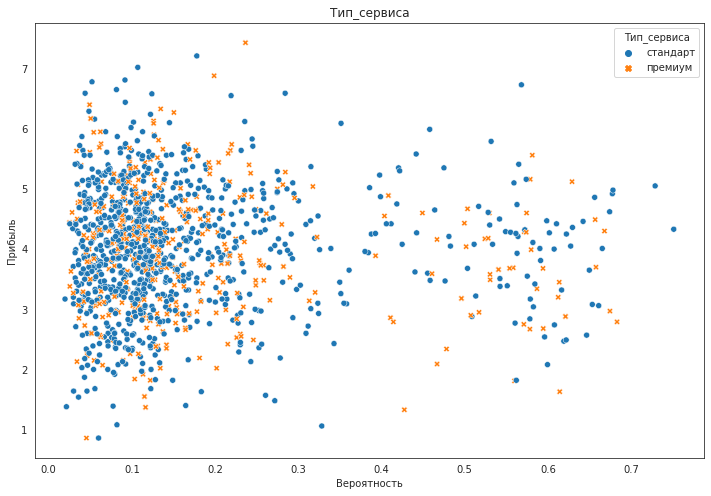

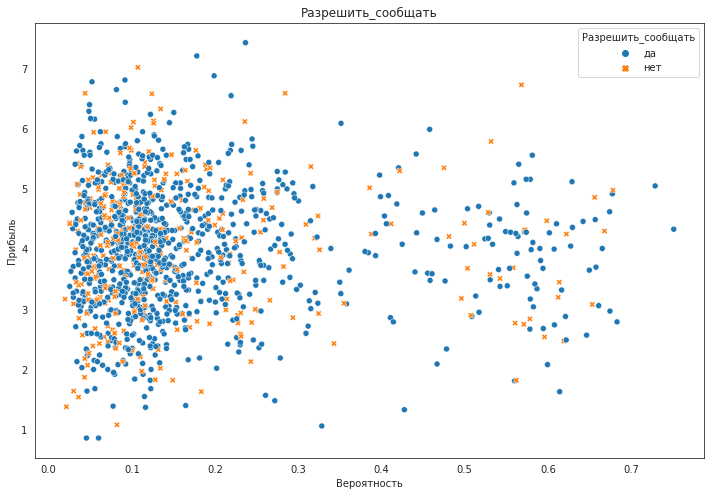

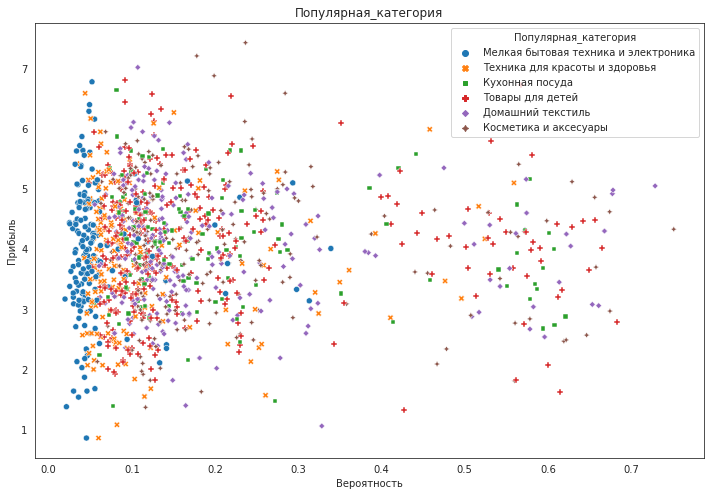

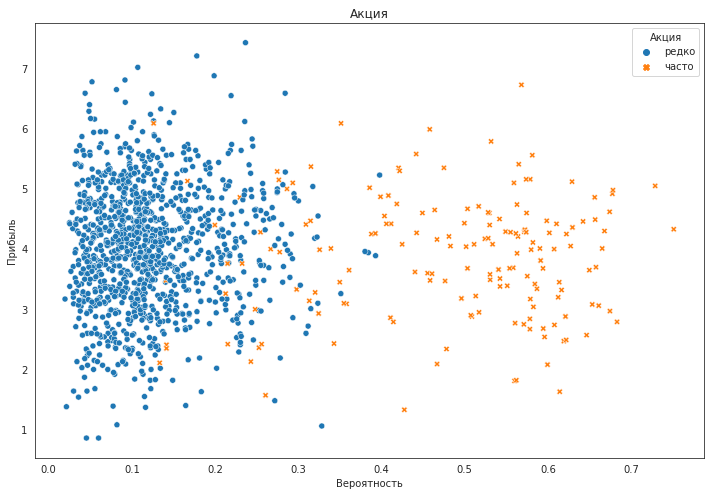

In [68]:
# остальные графики визуализируем в цикле
for i in df_market_predict.select_dtypes('object').columns:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df_market_predict,
                    y='Прибыль',
                    x='Вероятность',
                    hue = df_market_predict[i],
                    style=df_market_predict[i])
    plt.title(i)
    plt.xlabel('Вероятность')
    plt.ylabel('Прибыль')
    plt.show()

Самый весомый признак нашей модели Акция - самый яркий: на графике можно почти точно провести линию, которая поделит область на 2 категории. По этому признаку и сегментируем покупателей. Выделим группу клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. Выберем порог вероятности в 0.6, потому что вероятности больше 0.8 у нас нет.

In [69]:
df_market_predict['Сегмент'] = df_market_predict.apply \
    (lambda row: 'Прогноз_снижение' \
        if (row['Вероятность'] > 0.6 and row['Акция']=='часто') \
        else 'Прогноз_сохранение', axis=1)
display(df_market_predict['Сегмент'].value_counts())

Прогноз_сохранение    1264
Прогноз_снижение        32
Name: Сегмент, dtype: int64

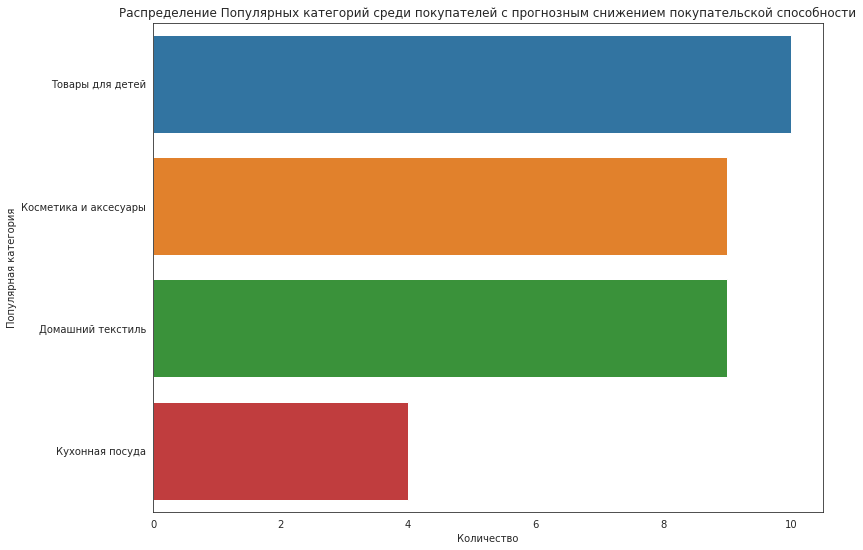

In [70]:
sns.countplot(y='Популярная_категория', data = df_market_predict.query('Сегмент == "Прогноз_снижение"'))
plt.title('Распределение Популярных категорий среди покупателей с прогнозным снижением покупательской способности')
plt.xlabel('Количество')
plt.ylabel('Популярная категория')
plt.show()

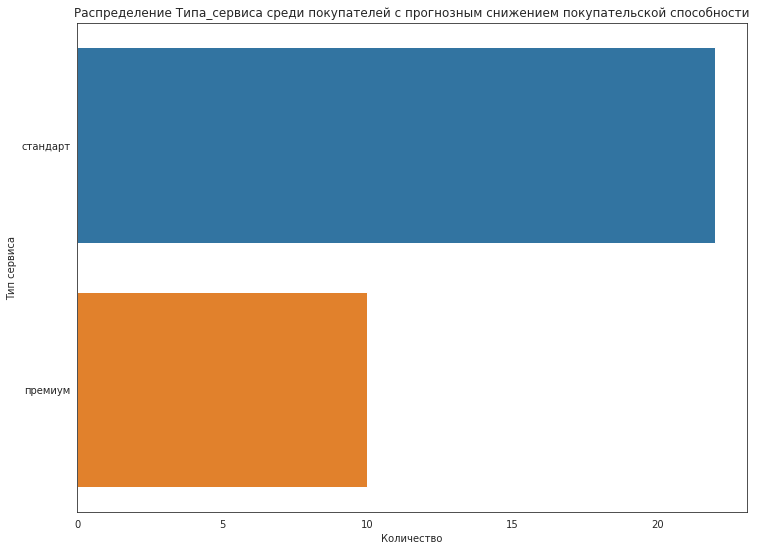

In [71]:
sns.countplot(y='Тип_сервиса', data = df_market_predict.query('Сегмент == "Прогноз_снижение"'))
plt.title('Распределение Типа_сервиса среди покупателей с прогнозным снижением покупательской способности')
plt.xlabel('Количество')
plt.ylabel('Тип сервиса')
plt.show()

Из двух построенных графиков видим, что любители акций, которые потенциально близки к снижению своей покупательской способности, предпочитают стандартный сервис (экономят) и Товары для детей, Домашний текстиль, посуда, аксессуары, так что скорее всего, это женщины и большинство из них - молодые мамы. 

**Вывод по результатам сегментации клиентов**    

Для сегментирования клиентов мы взяли за отправную точку самый важный показатель нашей модели - Акция, то есть люди, которые совершают большинство своих покупок по акции. Используя вероятности снижения покупательской способности для таких клиентов, предсказанные моделью, мы задали порог в 0.6 и отобрали 52 клиента. Для них мы проанализировали категории, в которых они предпочитают делать покупки, и тип сервиса. Получилось, что это люди, предпочитающие стандартный сервис и покупающие товары для детей, домашние текстиль, посуду и косметику.    
Мы сделали вывод, что это женщины и большинство из них - молодые мамы.    
Какой совет можно дать бизнесу, чтобы привлечь внимание такой категории покупателей? Предложить им товары для мужчин по акции, бесплатную доставку с каждой n-ной покупкой.

## Общий вывод ##

Перед нами стояла задача: разработать модель, которая сможет по входным данным предсказать снижение покупательской способности клиентов интернет-магазина.    
Для решения этой задачи мы прошли все этапы работы с данными:    
- на этапе **предобработки данных** мы избавились от орфографических ошибок в данных, дублей данные не содержали;
- на этапе **исследовательского анализа** мы выяснили, что:     
 - в представленных данных есть количественные и категориальные данные;
 - количественные данные имеют близкое к нормальному распределение, но смещены влево;
 - из анализа самих данных вы составили приблизительный портрет клиента интернет-магазина:    
      - Покупательская *активность* большинства покупателей *сохраняется на прежнем уровне* (приблизительно 800 против 500);
      - Тип сервиса Стандарт *популярнее* Премиума (приблизительно 900 против 400);
      - Большая часть покупателей *согласились с рассылкой* предложений (приблизительно 1000 против 400);
      - Самая популярная категория у покупателей - Товары для детей (приблизительно 325 против 250 в следующей по популярности категории).   
 - данные дополнительных таблиц с выручкой по месяцам, прибылью и количеством проведенных на сайте минут также имеют нормальное распределение.
- перед началом **корреляционного анализа** данных мы собрали из всех переданных заказчиком файлов единый набор, его дальше и исследовали.
    Выяснили, что на наш *целевой показатель Покупательская активность* больше всего влияют:
    - Количество минут, проведенных на сайте за последние 3 месяца (Минут3мес),
    - Количество страниц, просмотренных покупателем за 1 визит (Страниц_за_визит),
    - Маркетинговая активность компании за последние 6 месяцев и Средний просмотр категорий за 1 визит покупателя в равной степени,
    - Акционные_покупки,
    - Неоплаченные_продукты_штук_квартал.
- на следующем этапе мы **собрали пайплайн** для построения модели машинного обучения. Описали в пайплайне 4 модели:
    - KNeighborsClassifier(),
    - DecisionTreeClassifier(),
    - LogisticRegression(),
    - SVC(),
    для которых подобрали гиперпараметры, из которых модель отобрала лучшую, которой оказалась модель логистической регрессии со следующими параметрами:    
    - LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear'),
    - лучшей метрикой roc_auc, определенной кросс-валидацией = 0.9.    
    и показателями точности прогноза на тестовой выборке:    
    - roc_auc = 0.92,
    - f1-мера = 0.89.    
- для проверки адекватности полученной нами модели мы обучили еще одну модель методом DummyClassifier на тренировочных данных. Проверили ее качество на тестовой выборке и подсчитали оценку roc-auc, которой оценивали первую рабочую модель. Оценка roc_auc, которую мы рассчитали для модели Dummy, получилась равной 0.5. То есть все наши усилия оправдали себя.    
    
- следующим этапом мы проанализировали модель и оценили важность признаков, на которых она построила прогноз:
    - самыми значимыми оказались:
        - покупка акционных продуктов,
        - покупки в категории Мелкая бытовая техника и техника для красоты и здоровья,
        - средний показатель просмотров категорий за визит,
        - количество минут, проведенных на сайте в последние 3 месяца,
        - неоплаченные продукты в корзине.
    - совершенно не влияющими на решение:
        - суммарная выручка за последние 3 месяца,
        - действия маркетологов в текущем месяце.
    Из анализа индивидуального влияния признаков на конечное решение спрогнозировать снижение покупательской активности пользователя, построенную с применением SHAP-методов, мы увидели, что:    
        - чем больше акционных товаров у покупателя, тем выше риск снижения его покупательской активности,
        - чем больше покупок в категориях мелкая бытовая техника и техника для красоты, тем выше шансы у такого покупателя сохранить покупательскую активность,
        - увеличение показателя среднего просмотра категорий за визит сохраняет его покупательскую способность, а уменьшение - снижает и покупательскую активность,
        - также увеличение количества страниц и минут за визит ведут к сохранению покупательской способности.    
        
    в итоге, мы предлагаем интернет-магазину:
        - признаки Акционные_покупки и мелкая бытовая техника и техника для красоты и здоровья в Популярная_категория сильно влияют на покупательскую способность клиента, так что необходимо их правильно сочетать;
        - для людей, которые и так часто покупают товары, необходимо снизить количество маркетинговых предложений, чтобы не "пережать";
        - для всех покупателей необходимо рекламировать товары из категорий, где они не делают покупок, например, контекстной рекламой;
        
- последним этапом мы сегментировали клиентов для построения детального портрета клиента, который максимально близок к снижению покупательской способности в ближайщие 3 месяца. Для этого мы взяли за отправную точку самый важный показатель нашей модели - Акция, то есть люди, которые совершают большинство своих покупок по акции. Используя вероятности снижения покупательской способности для таких клиентов, предсказанные моделью, мы задали порог в 0.6 и отобрали 52 клиента. Для них мы проанализировали категории, в которых они предпочитают делать покупки, и тип сервиса. Получилось, что это люди, предпочитающие стандартный сервис и покупающие товары для детей, домашние текстиль, посуду и косметику.
    Мы сделали вывод, что мы получили портрет женщины и большинство из них - молодые мамы.    
    Какой совет можно дать бизнесу, чтобы привлечь внимание такой категории покупателей? Предложить им товары для мужчин по акции, бесплатную доставку с каждой n-ной покупкой.